In [1]:
import pandas as pd

import numpy as np

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import xgboost as xgb
from time import time
import os
# statistics
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#from fbprophet import Prophet
import warnings
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from pandas import DataFrame
import warnings
warnings.filterwarnings('ignore')
store=pd.read_csv('store.csv')
from IPython.display import display, Markdown
from math import sqrt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import mean_squared_error
# Importing required libraries
import numpy as np
import pandas as pd, datetime
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
from time import time
import os
from math import sqrt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import itertools
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.tsa.arima_model import  ARIMA
from sklearn import model_selection
from sklearn.metrics import mean_squared_error, r2_score
from pandas import DataFrame
import xgboost as xgb
#from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')
# Importing store data
store=pd.read_csv('store.csv')

In [2]:
df =pd.read_csv("final_features_for.csv",index_col=0)

In [3]:
df

,Store,CompetitionDistance,Promo,Promo2,SchoolHoliday,StoreType,Assortment,StateHoliday,DayOfWeek,Month,Day,Year,WeekOfYear,CompetitionOpen,PromoOpen,IsPromoMonth,Sales,Date
0,1,1270.0,1,0,1.0,3,1,0,4,7,31,2015,31,82.0,0.0,0,5263,2015-07-31
1,1,1270.0,1,0,1.0,3,1,0,3,7,30,2015,31,82.0,0.0,0,5020,2015-07-30
2,1,1270.0,1,0,1.0,3,1,0,2,7,29,2015,31,82.0,0.0,0,4782,2015-07-29
3,1,1270.0,1,0,1.0,3,1,0,1,7,28,2015,31,82.0,0.0,0,5011,2015-07-28
4,1,1270.0,1,0,1.0,3,1,0,0,7,27,2015,31,82.0,0.0,0,6102,2015-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
844333,292,1100.0,1,0,0.0,1,1,0,0,1,7,2013,2,43.0,0.0,0,9291,2013-01-07
844334,292,1100.0,0,0,0.0,1,1,0,5,1,5,2013,1,43.0,0.0,0,2748,2013-01-05
844335,292,1100.0,0,0,1.0,1,1,0,4,1,4,2013,1,43.0,0.0,0,4202,2013-01-04
844336,292,1100.0,0,0,1.0,1,1,0,3,1,3,2013,1,43.0,0.0,0,4580,2013-01-03


In [4]:
df1= df.sample(n =50000 ,random_state =1)

In [5]:
datetime_series =  pd.to_datetime(df1['Date'])

In [6]:
datetime_index = pd.DatetimeIndex(datetime_series.values)

In [7]:
df2=df1.set_index(datetime_index)

In [8]:
df2.drop('Date',axis=1,inplace=True)

In [9]:
df2['Sales'] = df2['Sales'] * 1.0

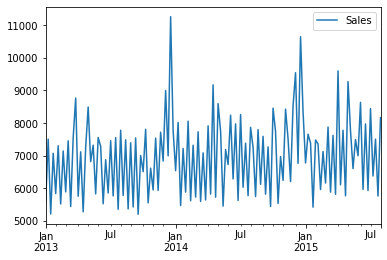

In [10]:
# Summing sales on per week basis
train_arima = df2.resample("W").mean() 
train_arima = train_arima[["Sales"]]
train_arima.plot();

In [11]:
# Fitting the data to SARIMA model 
model_sarima = sm.tsa.statespace.SARIMAX(train_arima,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_sarima = model_sarima.fit()

#print(results_sarima.summary().tables[1])
print(results_sarima.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                  135
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -917.816
Date:                            Mon, 06 Jul 2020   AIC                           1843.632
Time:                                    17:34:48   BIC                           1854.361
Sample:                                01-06-2013   HQIC                          1847.982
                                     - 08-02-2015                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6069      0.091     -6.686      0.000      -0.785      -0.429
ma.L1         -0.6228      0.066   

In [12]:
sales_a = df2[df2.Store == 2]['Sales']

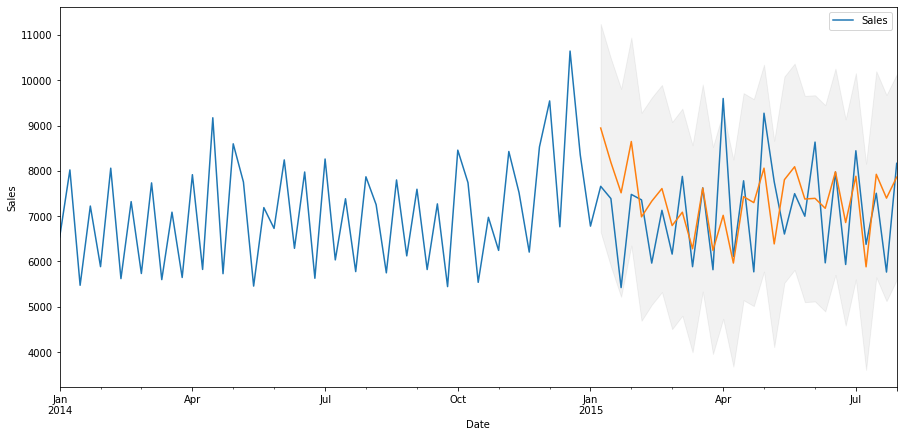

Root Mean Squared Error:  1054.4312825428465


In [13]:
# Model Prediction and validation 
# Predictions are performed for the 11th Jan' 2015 onwards of the train data.

pred = results_sarima.get_prediction(start=pd.to_datetime('2015-01-11'), dynamic = False) 
##print("the prediction for the given date is{}".format(pred))

# Get confidence intervals of forecasts
pred_ci = pred.conf_int() 
#print(pred_ci)

ax = train_arima["2014":].plot(label = "observed", figsize=(15, 7))
pred.predicted_mean.plot(ax = ax, label = "One-step ahead Forecast", alpha = 1)
ax.fill_between(pred_ci.index, 
                pred_ci.iloc[:, 0], 
                pred_ci.iloc[:, 1], 
                color = "k", alpha = 0.05)

ax.set_xlabel("Date")
ax.set_ylabel("Sales")

plt.legend
plt.show()

train_arima_forecasted = pred.predicted_mean
train_arima_truth = train_arima["2015-01-11":]
#print(train_arima_truth)

# Calculating the error
rms_arima = sqrt(mean_squared_error(train_arima_truth, train_arima_forecasted))
print("Root Mean Squared Error: ", rms_arima)

In [14]:
X =df.drop(['Sales' ,'Date'], axis=1)
y =df.Sales

In [15]:
from sklearn.model_selection import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(X,y,test_size=0.3, random_state=1)
#xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

In [16]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(xd_train, yd_train)

In [17]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
yd_predicted = linreg.predict(xd_train)
yd_test_predicted_lr = linreg.predict(xd_test)

print("Regresion Model Score" , ":" , linreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , linreg.score(xd_test, yd_test))
print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted_lr))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted_lr))

Regresion Model Score : 0.18411470394082852 , Out of Sample Test Score : 0.18429466941747452
Training RMSE : 2800.6254571545956 Testing RMSE : 2810.092561845567
Training MAPE : 34.02495349081433 Testing MAPE : 34.035494152430225


In [24]:
len(yd_test_predicted_lr)

253302

Text(0, 0.5, 'Sales')

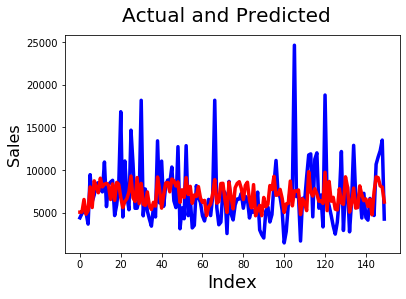

In [30]:
# Actual vs Predicted
c = [i for i in range(0,150,1)]
fig = plt.figure()
plt.plot(c,yd_test[:150], color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,yd_test_predicted_lr[:150], color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)  

In [31]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(xd_train, yd_train)

In [32]:
# validation
print("Regresion Model Score" , ":" , rdgreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , rdgreg.score(xd_test, yd_test))

yd_predicted = rdgreg.predict(xd_train)
yd_test_predicted_reg = rdgreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted_reg))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted_reg))

Regresion Model Score : 0.18411464092709728 , Out of Sample Test Score : 0.18429481436678596
Training RMSE : 2800.6255653057397 Testing RMSE : 2810.09231217146
Training MAPE : 34.025017887377665 Testing MAPE : 34.03559725828231


Text(0, 0.5, 'Sales')

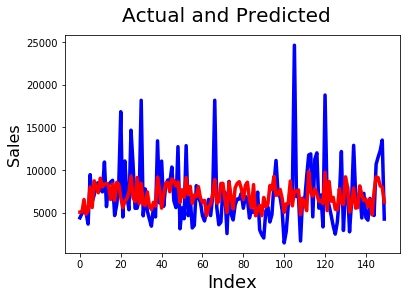

In [33]:
# Actual vs Predicted
c = [i for i in range(0,150,1)]
fig = plt.figure()
plt.plot(c,yd_test[:150], color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,yd_test_predicted_reg[:150], color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)  

In [34]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(xd_train, yd_train)

In [35]:
print("Regresion Model Score" , ":" , lasreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(xd_test, yd_test))

yd_predicted = lasreg.predict(xd_train)
yd_test_predicted_las = lasreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yd_predicted),
      "Testing RMSE", ":", rmse(yd_test, yd_test_predicted_las))
print("Training MAPE", ":", mape(yd_train, yd_predicted),
      "Testing MAPE", ":", mape(yd_test, yd_test_predicted_las))

Regresion Model Score : 0.18278469718532497 , Out of Sample Test Score : 0.18307456503710617
Training RMSE : 2802.9072325617312 Testing RMSE : 2812.193397144276
Training MAPE : 34.076636485117795 Testing MAPE : 34.090618655492705


Text(0, 0.5, 'Sales')

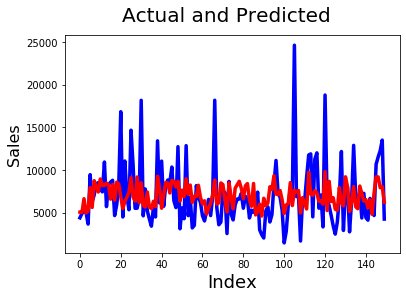

In [36]:
# Actual vs Predicted
c = [i for i in range(0,150,1)]
fig = plt.figure()
plt.plot(c,yd_test[:150], color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,yd_test_predicted_las[:150], color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)  

In [37]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(xd_train, yd_train)

In [38]:
print("Regresion Model Score" , ":" , treereg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , treereg.score(xd_test, yd_test))

yl_predicted = treereg.predict(xd_train)
yl_test_predicted_dt = treereg.predict(xd_test)
print("Training RMSE", ":", rmse(yd_train, yl_predicted),
      "Testing RMSE", ":", rmse(yd_test, yl_test_predicted_dt))
print("Training MAPE", ":", mape(yd_train, yl_predicted),
      "Testing MAPE", ":", mape(yd_test, yl_test_predicted_dt))

Regresion Model Score : 0.8723898523553927 , Out of Sample Test Score : 0.8400727086950424
Training RMSE : 1107.6003506489126 Testing RMSE : 1244.2718216932476
Training MAPE : 10.319988521934516 Testing MAPE : 11.561262264329104


Text(0, 0.5, 'Sales')

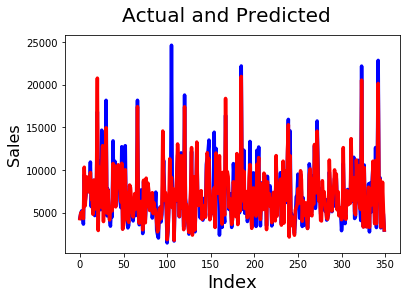

In [50]:
# Actual vs Predicted
c = [i for i in range(0,350,1)]
fig = plt.figure()
plt.plot(c,yd_test[:350], color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,yl_test_predicted_dt[:350], color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)  

In [41]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xd_train, yd_train)

In [42]:
print("Regresion Model Score" , ":" , rdfreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , rdfreg.score(xd_test, yd_test))   

yl_predicted = rdfreg.predict(xd_train)
yl_test_predicted_rd = rdfreg.predict(xd_test)

print("Training RMSE", ":", rmse(yd_train, yl_predicted),
      "Testing RMSE", ":", rmse(yd_test, yl_test_predicted_rd))
print("Training MAPE", ":", mape(yd_train, yl_predicted),
      "Testing MAPE", ":", mape(yd_test, yl_test_predicted_rd))

Regresion Model Score : 0.9853393393011892 , Out of Sample Test Score : 0.9036937113838567
Training RMSE : 375.41986599694184 Testing RMSE : 965.5645187514577
Training MAPE : 3.507763586314833 Testing MAPE : 9.196989554884262


Text(0, 0.5, 'Sales')

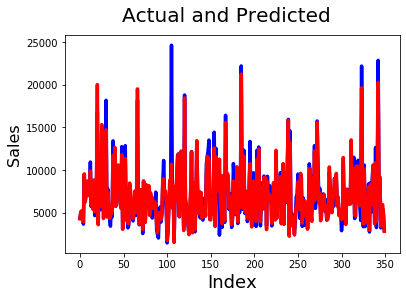

In [51]:
# Actual vs Predicted
c = [i for i in range(0,350,1)]
fig = plt.figure()
plt.plot(c,yd_test[:350], color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,yl_test_predicted_rd[:350], color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)  

In [44]:
# Splitting the data
features = df.drop(["Sales","Date"], axis = 1)
target = df["Sales"]

X_train, X_test, y_train, y_test = model_selection.train_test_split(features, target, test_size = 0.20)

In [45]:
# Tuning parameters - using default metrics
params = {'max_depth':6, "booster": "gbtree", 'eta':0.3, 'objective':'reg:linear'} 

dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test, y_test)
watchlist = [(dtrain, 'train'), (dtest, 'eval')]

# Training the model
xgboost = xgb.train(params, dtrain, 200, evals=watchlist,early_stopping_rounds= 200, verbose_eval=True)
         
# Making predictions
preds = xgboost.predict(dtest)

[17:47:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:168: reg:linear is now deprecated in favor of reg:squarederror.
[0]	train-rmse:5654.14551	eval-rmse:5664.05615
Multiple eval metrics have been passed: 'eval-rmse' will be used for early stopping.

Will train until eval-rmse hasn't improved in 200 rounds.
[1]	train-rmse:4374.23193	eval-rmse:4387.42920
[2]	train-rmse:3567.67188	eval-rmse:3579.61572
[3]	train-rmse:3070.76074	eval-rmse:3083.57105
[4]	train-rmse:2797.91992	eval-rmse:2809.54419
[5]	train-rmse:2626.35571	eval-rmse:2636.30664
[6]	train-rmse:2520.01636	eval-rmse:2530.21704
[7]	train-rmse:2469.27222	eval-rmse:2478.31396
[8]	train-rmse:2420.08643	eval-rmse:2429.02588
[9]	train-rmse:2383.66357	eval-rmse:2391.90454
[10]	train-rmse:2341.03198	eval-rmse:2349.02148
[11]	train-rmse:2330.22070	eval-rmse:2338.35352
[12]	train-rmse:2309.23340	eval-rmse:2317.90601
[13]	train-rmse:2280.73169	eval-rmse:2290.07422
[14]	train-rmse:2

[163]	train-rmse:999.48859	eval-rmse:1015.53046
[164]	train-rmse:999.12079	eval-rmse:1015.25452
[165]	train-rmse:997.50958	eval-rmse:1013.62561
[166]	train-rmse:995.86298	eval-rmse:1011.97852
[167]	train-rmse:994.06311	eval-rmse:1010.21094
[168]	train-rmse:992.19055	eval-rmse:1008.44708
[169]	train-rmse:990.97723	eval-rmse:1007.33862
[170]	train-rmse:990.06793	eval-rmse:1006.60529
[171]	train-rmse:989.01294	eval-rmse:1005.50446
[172]	train-rmse:987.15057	eval-rmse:1003.65796
[173]	train-rmse:985.33612	eval-rmse:1001.82398
[174]	train-rmse:983.91534	eval-rmse:1000.46838
[175]	train-rmse:982.56665	eval-rmse:999.18243
[176]	train-rmse:981.44562	eval-rmse:998.12268
[177]	train-rmse:979.84680	eval-rmse:996.89648
[178]	train-rmse:978.92407	eval-rmse:996.08118
[179]	train-rmse:977.85944	eval-rmse:994.98743
[180]	train-rmse:976.80798	eval-rmse:993.93897
[181]	train-rmse:974.49365	eval-rmse:991.65546
[182]	train-rmse:971.03223	eval-rmse:988.55078
[183]	train-rmse:968.89600	eval-rmse:986.56281
[

In [47]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 958.726373


Text(0, 0.5, 'Sales')

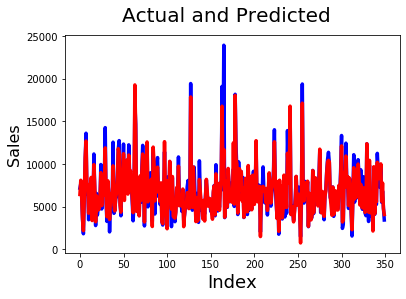

In [49]:
# Actual vs Predicted
c = [i for i in range(0,350,1)]
fig = plt.figure()
plt.plot(c,y_test[:350], color="blue", linewidth=3.5, linestyle="-")     #Plotting Actual
plt.plot(c,preds[:350], color="red",  linewidth=3.5, linestyle="-")  #Plotting predicted
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)  

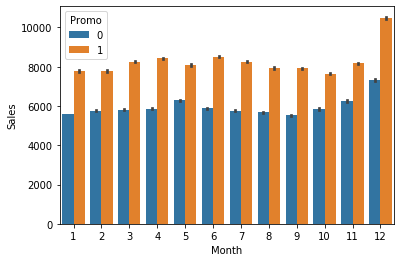

In [97]:
sns.barplot(x ='Month', y ='Sales', data = df, hue ='Promo') 

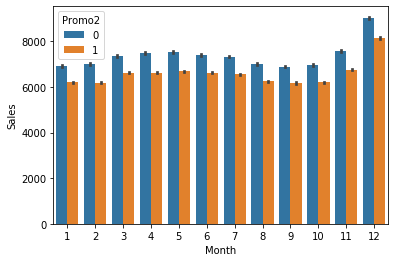

In [98]:
sns.barplot(x ='Month', y ='Sales', data = df, hue ='Promo2') 

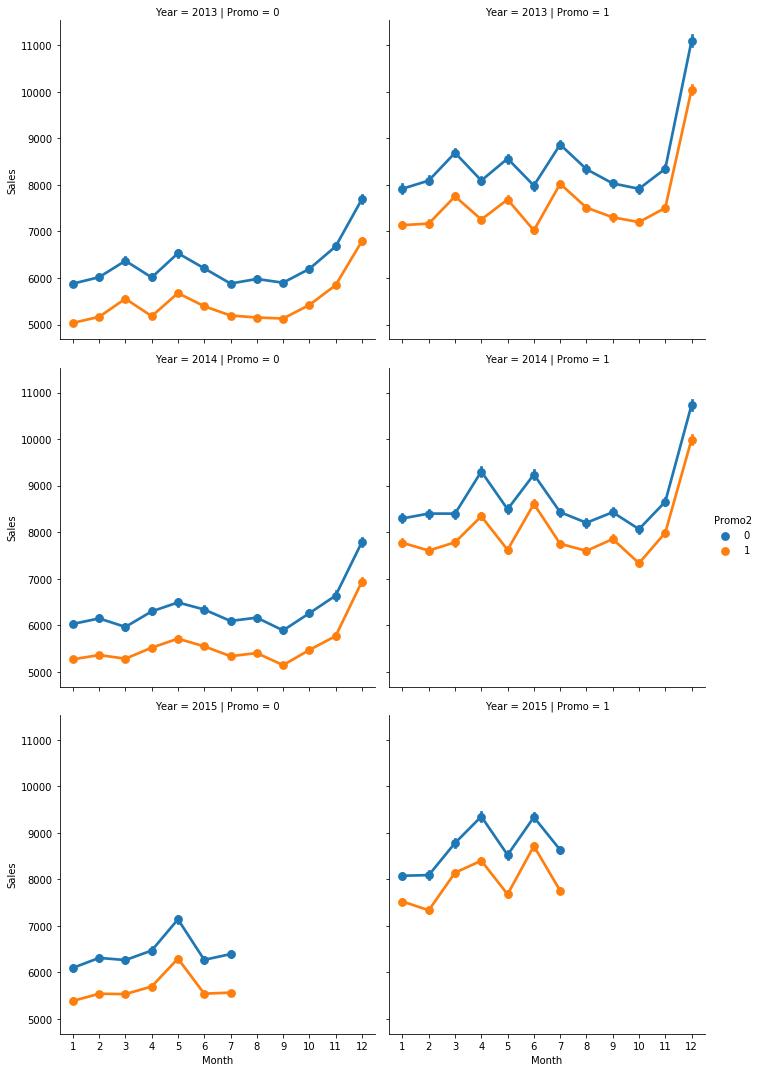

In [96]:
# Sales trend ov




er the months
sns.factorplot(data = df, x ="Month", y = "Sales", 
               col = 'Promo', # per store type in cols
               hue = 'Promo2',
               row = "Year"
             );